In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from matplotlib import rc
rc('font', size=20)

In [2]:
#load and normalize the data
data = np.load('../InfiniteUnfolding/rawdata.npz')
substructure_variables = ['pT', 'w', 'q', 'm', 'r', 'tau1s', 'tau2s']
data_streams = ['_true', '_true_alt', '_reco', '_reco_alt']
n_variables = len(substructure_variables)


normalize = True
    
for var_name in data.files:
    globals()[var_name] = data[var_name][:150000]
    
if normalize:
    for var_name in substructure_variables:
        mu = np.mean(globals()[var_name+data_streams[0]])
        sig = np.std(globals()[var_name + data_streams[0]])
        for stream in data_streams:
            globals()[var_name+stream] = (globals()[var_name+stream] - mu)/sig

In [3]:
binvals = [pT_true.min()]
i = 0
while binvals[-1] < pT_true.max() and i < len(binvals):
    for binhigh in np.linspace(binvals[i] + 0.1, pT_true.max(), 10):
        in_bin = (pT_true > binvals[i]) & (pT_true < binhigh)
        in_reco_bin = (pT_reco > binvals[i]) & (pT_reco < binhigh)
        if np.sum(in_bin) > 0:
            purity = np.sum(in_bin & in_reco_bin) / np.sum(in_bin)
            if purity > np.sqrt(0.5):
                print(f"{binhigh = }, {purity = }")
                i += 1
                binvals.append(binhigh)
                break
    else:
        break

print(f"{len(binvals) = }")

binhigh = 0.0657843608631179, purity = 0.9382662779806569
binhigh = 1.904197568409252, purity = 0.825941180122938
binhigh = 3.5383426417835935, purity = 0.7479992192074956
binhigh = 6.343489438893534, purity = 0.7654698242933538
binhigh = 8.525270281090155, purity = 0.7452229299363057
len(binvals) = 6


In [4]:
#Next, let's construct the response matrix.

pTbin_truth = np.clip(np.digitize(pT_true,binvals),1,len(binvals)-1)-1
pTbin_reco = np.clip(np.digitize(pT_reco,binvals),1,len(binvals)-1)-1

#alt

pTbin_truth_alt = np.clip(np.digitize(pT_true_alt,binvals),1,len(binvals)-1)-1
pTbin_reco_alt = np.clip(np.digitize(pT_reco_alt,binvals),1,len(binvals)-1)-1

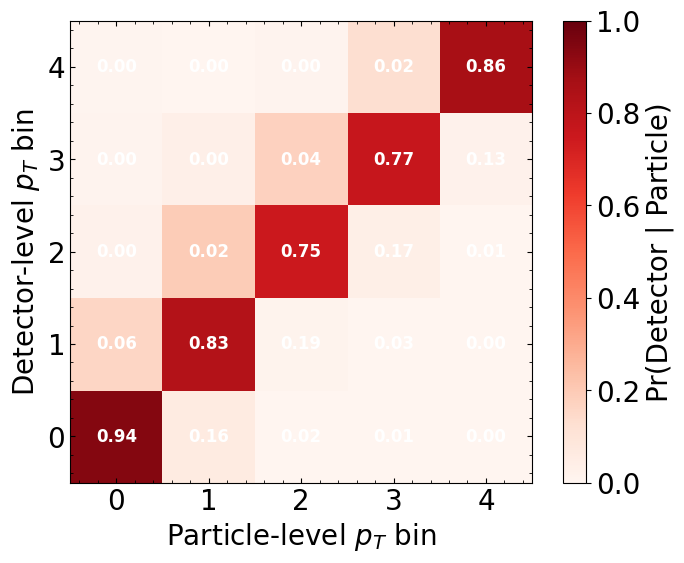

In [5]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
    
H_pT, xedges, yedges = np.histogram2d(pTbin_truth,pTbin_reco,bins=[range(len(binvals)),range(len(binvals))])
H_norm_pT = H_pT / H_pT.sum(axis=1, keepdims=True)
plt.imshow(H_norm_pT,origin='lower',cmap="Reds",vmin = 0,vmax = 1)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Pr(Detector | Particle)') 
plt.xlabel("Particle-level $p_{T}$ bin",fontsize=20)
plt.ylabel("Detector-level $p_{T}$ bin",fontsize=20)

for i in range(len(binvals)-1):
    for j2 in range(len(binvals)-1):
        plt.text(j2,i, "%0.2f" % H_norm_pT.T[i,j2], 
                color="w", ha="center", va="center", fontweight="bold",fontsize=12)
plt.show()
#fig.savefig('figures/RsponsepT.pdf',bbox_inches='tight')

## IBU

In [15]:
MAX_BINS = 50  # Desired maximum bins
q_range = np.max(np.abs(q_true))  # Approximate max absolute value of q_true

binvals_q = {}

for ii in range(len(binvals) - 1):
    binvals_q[ii] = []
    bin_width = (2 * q_range) / MAX_BINS  # Calculate the width of each bin based on total range
    half_bins = MAX_BINS // 2  # Half the number of bins for symmetry

    # Generate symmetric bins around zero
    for jj in range(-half_bins, half_bins + 1):
        if jj == -half_bins:
            binvals_q[ii].append(-q_range)  # Start with the minimum
        elif jj == half_bins:
            binvals_q[ii].append(q_range)  # End with the maximum
        else:
            binvals_q[ii].append(jj * bin_width)  # Intermediate values

    # Adjust if MAX_BINS is even to ensure symmetry
    if MAX_BINS % 2 == 0:
        binvals_q[ii][-1] = q_range  # Ensure the last bin ends at the maximum value

# Print results for verification
for key, value in binvals_q.items():
    print(f"pT bin {key+1}: {value}")


pT bin 1: [-7.116162894446195, -6.831516378668348, -6.5468698628905, -6.262223347112652, -5.9775768313348046, -5.692930315556957, -5.408283799779109, -5.123637284001261, -4.838990768223413, -4.554344252445565, -4.269697736667718, -3.9850512208898694, -3.700404705112022, -3.415758189334174, -3.131111673556326, -2.8464651577784785, -2.5618186420006306, -2.2771721262227826, -1.9925256104449347, -1.707879094667087, -1.4232325788892393, -1.1385860631113913, -0.8539395473335435, -0.5692930315556957, -0.28464651577784783, 0.0, 0.28464651577784783, 0.5692930315556957, 0.8539395473335435, 1.1385860631113913, 1.4232325788892393, 1.707879094667087, 1.9925256104449347, 2.2771721262227826, 2.5618186420006306, 2.8464651577784785, 3.131111673556326, 3.415758189334174, 3.700404705112022, 3.9850512208898694, 4.269697736667718, 4.554344252445565, 4.838990768223413, 5.123637284001261, 5.408283799779109, 5.692930315556957, 5.9775768313348046, 6.262223347112652, 6.5468698628905, 6.831516378668348, 7.116162

In [16]:
xt = q_true
xr = q_reco

xbin_truth_all = np.array([np.clip(np.digitize(xt,binvals_q[ii]),1,len(binvals_q[ii])-1)-1 for ii in range(len(binvals)-1)])
xbin_reco_all = np.array([np.clip(np.digitize(xr,binvals_q[ii]),1,len(binvals_q[ii])-1)-1 for ii in range(len(binvals)-1)] )
xbin_truth_all = xbin_truth_all.T
xbin_reco_all = xbin_reco_all.T

xbin_truth = np.array([xbin_truth_all[i][pTbin_truth[i]] for i in range(len(pTbin_truth))])
xbin_reco = np.array([xbin_reco_all[i][pTbin_reco[i]] for i in range(len(pTbin_reco))])

bin2_truth = []
for i in range(len(pTbin_truth)):
    mybin = 0
    for i2 in range(0,pTbin_truth[i]):
        mybin+=len(binvals_q[i2])-1
    bin2_truth+=[mybin+xbin_truth[i]]

bin2_reco = []
for i in range(len(pTbin_reco)):
    mybin = 0
    for i2 in range(0,pTbin_reco[i]):
        mybin+=len(binvals_q[i2])-1
    bin2_reco+=[mybin+xbin_reco[i]]

In [17]:


#alt
xta = q_true_alt
xra = q_reco_alt

pTbin_truth_alt = np.clip(np.digitize(pT_true_alt,binvals),1,len(binvals)-1)-1
pTbin_reco_alt = np.clip(np.digitize(pT_reco_alt,binvals),1,len(binvals)-1)-1

xbin_truth_all_alt = np.array([np.clip(np.digitize(xta,binvals_q[ii]),1,len(binvals_q[ii])-1)-1 for ii in range(len(binvals)-1)])
xbin_reco_all_alt = np.array([np.clip(np.digitize(xra,binvals_q[ii]),1,len(binvals_q[ii])-1)-1 for ii in range(len(binvals)-1)] )
xbin_truth_all_alt = xbin_truth_all_alt.T
xbin_reco_all_alt = xbin_reco_all_alt.T

xbin_truth_alt = np.array([xbin_truth_all_alt[i][pTbin_truth_alt[i]] for i in range(len(pTbin_truth_alt))])
xbin_reco_alt = np.array([xbin_reco_all_alt[i][pTbin_reco_alt[i]] for i in range(len(pTbin_reco_alt))])

bin2_truth_alt = []
for i in range(len(pTbin_truth_alt)):
    mybin = 0
    for i2 in range(0,pTbin_truth_alt[i]):
        mybin+=len(binvals_q[i2])-1
    bin2_truth_alt+=[mybin+xbin_truth_alt[i]]

bin2_reco_alt = []
for i in range(len(pTbin_reco_alt)):
    mybin = 0
    for i2 in range(0,pTbin_reco_alt[i]):
        mybin+=len(binvals_q[i2])-1
    bin2_reco_alt+=[mybin+xbin_reco_alt[i]]

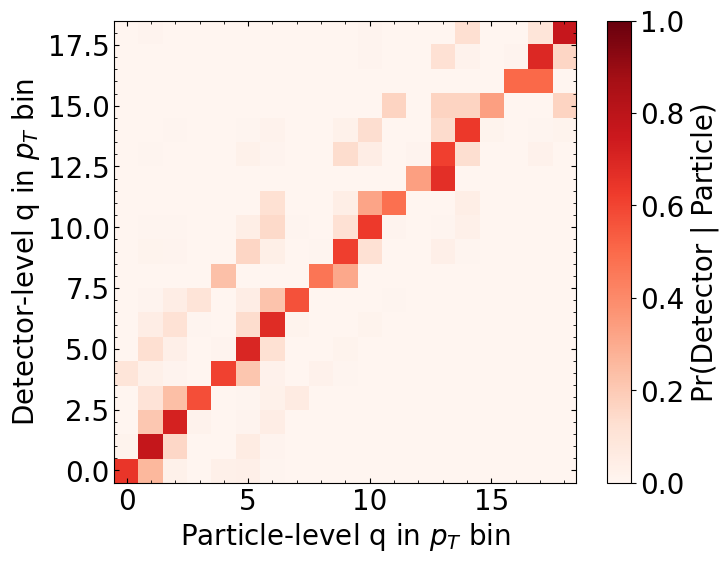

In [9]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

H, xedges, yedges = np.histogram2d(bin2_truth,bin2_reco,bins=[range(max(bin2_truth)+2),range(max(bin2_truth)+2)])
H_alt, xedges, yedges = np.histogram2d(bin2_truth_alt,bin2_reco_alt,bins=[range(max(bin2_truth)+2),range(max(bin2_truth)+2)])
H_norm = H / H.sum(axis=1, keepdims=True)
plt.imshow(H_norm,origin='lower',cmap="Reds",vmin = 0,vmax = 1)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Pr(Detector | Particle)')

plt.xlabel("Particle-level "+'q'+" in $p_{T}$ bin",fontsize=20)
plt.ylabel("Detector-level "+'q'+" in $p_{T}$ bin",fontsize=20)

plt.show()

In [18]:
def IBU(T,D,R,n):
    phis = [T]
    for i in range(n):
        m = R * phis[-1]
        m /= (m.sum(axis=1)[:,np.newaxis] + 10**-50)
        phis.append(np.dot(m.T, D))
    return phis[-1]

In [19]:
T = np.sum(H,axis=1)
D = np.sum(H,axis=0)
D_alt = np.sum(H_alt,axis=0)
T_alt = np.sum(H_alt,axis=1)
ibu = IBU(T,D_alt,H_norm.T,10)

In [20]:
means_binnedx = []
epsilon = 1e-10  # define epsilon to prevent division by zero

for i in range(len(binvals)-1):
    mybin = 0
    for i2 in range(0, i):
        mybin += len(binvals_q[i2]) - 1

    # Ensure that we do not go out of bounds of the ibu array
    ibu_i = [ibu[mybin + j] for j in range(min(len(binvals_q[i]) - 1, len(ibu) - mybin))]
    
    x_centers = 0.5 * (np.array(binvals_q[i][0:-1]) + np.array(binvals_q[i][1:]))
    xvals = [len(xt[(pTbin_truth == i) & (xbin_truth == j)]) for j in range(len(binvals_q[i])-1)]
    means_binnedx.append(np.sum(x_centers * xvals) / (np.sum(xvals) + epsilon))


In [23]:
weights_omnifold = np.load(f'npfiles/weights_omnifold_q.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'npfiles/weights_omnifold_q.npy'

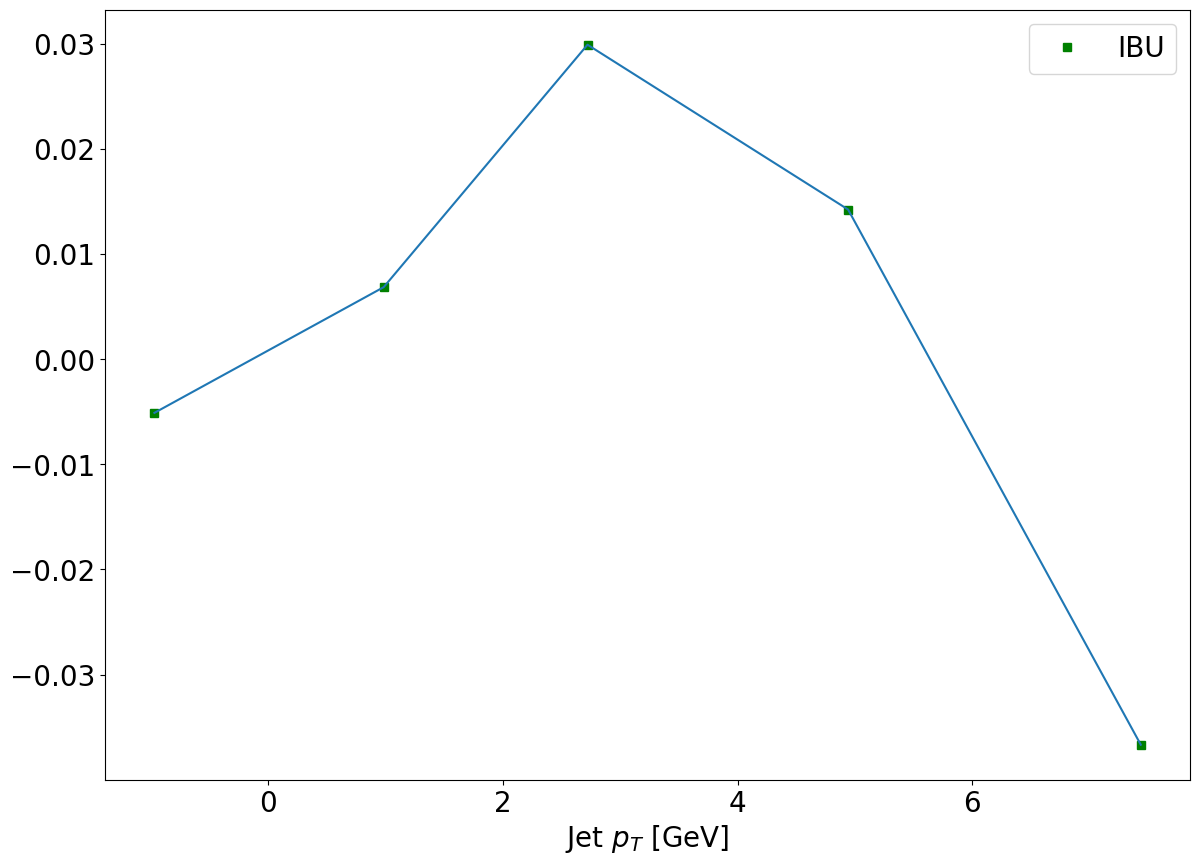

In [21]:
_, ax1 = plt.subplots(figsize=(14,10))
ax1.plot(0.5*(np.array(binvals[0:-1])+np.array(binvals[1:])),means_binnedx,marker='s',ls="",label="IBU", c = 'g')
ax1.plot(0.5*(np.array(binvals[0:-1])+np.array(binvals[1:])),means_binnedx)

plt.legend()
ax1.set_xlabel("Jet $p_{T}$ [GeV]",fontsize=20)
plt.show()